# Bricks and Board Code Challenge

## The Problem

I am in an open field with an endless supply of bricks. My hobby is stacking bricks up in equally-spaced columns of random heights.

I choose the number of columns randomly. It could be 10, or 27, or 63,972,152. I'm a patient guy and I like columns of bricks.

Each time, when I'm done, I lay a wooden board on top of the columns of bricks. I have access to a huge variety of board lengths, so I always choose one that starts exactly above the top of the first column, and stretches to exactly above the top of the last column, regardless of its angle.

It doesn't always touch the tops of those columns, of course. I chose the column heights randomly. Maybe on some occasions it rests on those, but in other cases it comes to rest on bricks anywhere in between them. It all depends on the height of the columns and where gravity dictates the board will sit. But in any case, these bricks are rough enough that the board never slides off, even at severe slopes.

Your job is to figure out, given the number of bricks in each column, the slope and y-intercept of my board.

Columns of bricks are provided in an array, where the array index is "x" and the value is "y".

## Forget The High School Line Formula Stuff?

Me too. Here's a quick refresher:

A straight line is defined by the formula y = mx + b:

* **x:** the column number, starting from 0
* **y:** the height of the board, in bricks, at that column
* **m:** the slope of the board, or "rise over run": take two points the board is touching, x1,y1 and x2,y2, and the slope is (y2 - y1) / (x2 - x1).
* **b:** y-intercept: how high the board is from the ground, in bricks, at column 0

> _Important Note:_ For simplicity, let's ignore the fact that any angled board will have a slightly varying height over the width of a stack of bricks. The board's height (y) when it's touching a brick is equal to the number of bricks beneath it.

## Here's an example

`[2, 14, 8, 94, 300, 210, 200, 99, 14, 12]`

Laying a board on top of this, it comes to rest on x=4 y=300, and x=6 y=200. ("Not 300 and 210?!" Some of you are thinking? Nope, if it rested on 210, the slope would be too severe that it would fall BELOW the top of the 200 stack. For real, check the math. This problem isn't as simple as it sounds.)

Slope is rise `(y2 - y1)` divided by run `(x2 - x1)`. So: `(200 - 300) / (6 - 4) = -50`.

y-intercept can then be found by plugging the slope into the y=mx+b line equation for either of those resting points above. I'll pick x=6 y=200:

```
200 = -50 * 6 + b
200 = -300 + b
b = 200 - -300
b = 500
```

So with those stacks, slope is **-50** and y-intercept is **500**.

Write me a function that outputs those two variables given any input array. No gravity-defying boards!

## We'll start with some boilerplate code to generate data and charts

No need to edit this, but we'll use it later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Function to generate an array of random integers
def generate_random_array(data_length):
    return np.random.randint(0, 100, data_length)

# Function to plot the data and the line
def plot_data_with_line(arr, slope, y_intercept):
    x = np.arange(len(arr))
    y = arr
    
    plt.scatter(x, y, color='red', label='Brick Column Tops')
    plt.plot(x, slope * x + y_intercept, color='blue', label='Board')
    
    plt.xlabel('Brick Column')
    plt.ylabel('Brick Height')
    plt.title('Brick Tops and Board')
    plt.show()

## Now it's your turn!

There's a code block below where you'll click and write your solution in Python. Not familiar with Python? No problem! Click CodeWhisperer -> Start CodeWhisperer:

![Start CodeWhiperer](http://i.tomfro.st/7Epnpy.png)

You can create a free Amazon Q sign-in if you don't have one. Click again, and you can see the shortcuts. I recommend clicking "Resume Auto-Suggestions":

![Resume Auto-Suggestions](http://i.tomfro.st/ZziCkh.png)

## Write your code here! The starter code runs, but isn't a real solution.

In [2]:
# Function to calculate the slope and y-intercept
def calculate_slope_intercept(arr):
    if len(arr) < 2:
        raise ValueError("Array must have at least two elements")

    column_spacing = 1 # distance between stacks in units of brick height

    # Calculating center of mass (com) along the x axis
    com_x = ((len(arr) - 1) * column_spacing) / 2

    # As the board slowly decends from the heavens the first contact will be the tallest stack of bricks.
    # Finding the x coordinate of the tallest stack.
    max_idx = np.where(arr == np.max(arr))[0][0]

    # If that tallest stack is directly under the center of mass of the board, the board will balance
    # on that stack and that is our answer, otherwise the board will start to rotate about this point.
    pivot_point = { 'x': (max_idx * column_spacing), 'y': arr[max_idx] , 'i': max_idx }
    if(pivot_point['x'] == com_x):
        # The board is perfectly balanced on the tallest stack, this is our final answer.
        return 0, arr[max_idx]

    def pivot_until_contact(pivot_point):
        # The board is now rotating about this pivot point. We figure out which way it is
        # rotating based on the pivot point's relation to the center of mass. We ignore
        # stacks that the board is rotating away from.
        if(pivot_point['x'] > com_x):
            start_idx = 0
            end_idx = pivot_point['i'] # Ignoring any point above this
        else:
            start_idx = pivot_point['i'] + 1 # Ignoring any point below this
            end_idx = len(arr)
    
        # As the board rotates we are looking for the first column the board will make contact with. To find this
        # column we will calculate the slope a line drawn from the current pivot point to all points on the same
        # side of the pivot point as the center of mass. Mathematically, the column we come in contact with will
        # be the one where the slope is closest to zero. (Looking for the minimum absolute value of slope)
        min_slope_buffer = { 'abs_value': float('inf') }
        for i in range(start_idx, end_idx):
            y = arr[i]
            x = (i * column_spacing)
            m = (y - pivot_point['y']) / (x - pivot_point['x'])
            abs_m = abs(m)
            if(abs_m < min_slope_buffer['abs_value']):
                min_slope_buffer['i'] = i
                min_slope_buffer['value'] = m
                min_slope_buffer['abs_value'] = abs_m
                min_slope_buffer['x'] = x
                min_slope_buffer['y'] = y
        
        # Resting point is the first point contacted by the rotating board, we need to do some tests
        # to see if the board will actually come to rest here or continue rotating about this new
        # pivot point.
        resting_point = { 'x': min_slope_buffer['x'], 'y': min_slope_buffer['y'] , 'i': min_slope_buffer['i'] }
    
        # Is the center of mass, between the pivot point and the resting point?
        min_x = min(pivot_point['x'], resting_point['x'])
        max_x = max(pivot_point['x'], resting_point['x'])
        if((com_x >= min_x) and (com_x <= max_x)):
            # Yes the center of mass is supported between the 2 contact points and has come to rest.
            # This is our final answer.
            intercept = arr[min_slope_buffer['i']] - (min_slope_buffer['value'] * (min_slope_buffer['i'] * column_spacing))
            return min_slope_buffer['value'], intercept

        # The board has now contacted 2 points but the center of mass is not yet supported so the board will now begin
        # rotating in the same direction but about the resting point, instead of the previous pivot point. At this point
        # we can now feed the new pivot point back into this function and repeat until the 2 columns supporting the 
        # board are on either side of the center of mass.
        return pivot_until_contact(resting_point)

    
    #  The board is not balanced on a single column, gravity will cause the board to start to rotate
    #  about this first contact point (pivot_point) until it makes contact with a second point.
    #  Finding that second point now.        
    return pivot_until_contact(pivot_point)

## Run it and see how it does!

The first time you run this code, hit the "Run all cells" button to initialize the boilerplate code:

![Run All Cells](http://i.tomfro.st/adTxxK.png)

After that, you can just click into the code block below and press the play button to see your code run on new random data:

![Play Button](http://i.tomfro.st/Y5dYGc.png)

If you change your code, remember that you'll need to re-run that cell or use the "Run all cells" button again!

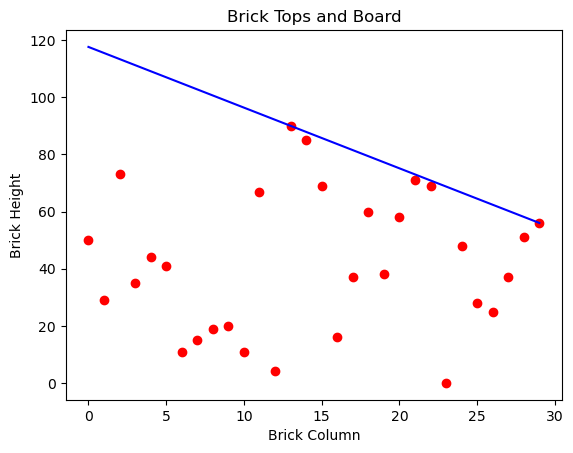

Data: [50, 29, 73, 35, 44, 41, 11, 15, 19, 20, 11, 67, 4, 90, 85, 69, 16, 37, 60, 38, 58, 71, 69, 0, 48, 28, 25, 37, 51, 56]
Slope: -2.125
Y-Intercept: 117.625


In [3]:
# Calling the functions to visualize the output
data_length = 30
random_array = generate_random_array(data_length)
slope, y_intercept = calculate_slope_intercept(random_array)
plot_data_with_line(random_array, slope, y_intercept)
print("Data:", json.dumps(random_array.tolist()))
print("Slope:", slope)
print("Y-Intercept:", y_intercept)

## Test it

Run the following code block to test your solution's accuracy. We'll run it 1000 times and check to make sure all the dots are on or under the line, and the line isn't defying gravity.

In [4]:
def print_fail(num, arr, slope, y_intercept, err):
    print(f"Test {num + 1} failed!")
    print(err)
    plot_data_with_line(arr, slope, y_intercept)
    print("Data:", json.dumps(arr.tolist()))
    print("Slope:", slope)
    print("Y-Intercept:", y_intercept)

errored = False
error_margin = 0.0000000000001
for i in range(0, 1000):
    arr = generate_random_array(30)
    slope, y_intercept = calculate_slope_intercept(arr)
    left_touch = False
    right_touch = False
    # Make sure all the points in arr are on or beneath the line
    for x, y in enumerate(arr):
        if y > slope * x + y_intercept + error_margin:
            print_fail(i, arr, slope, y_intercept, f"Point ({x},{y}) is above the line")
            errored = True
            break
        # Set touch to True if we find a point on the line
        if y > slope * x + y_intercept - error_margin:
            if x < len(arr) / 2:
                left_touch = True
            else:
                right_touch = True
    if not errored and not (left_touch and right_touch):
        print_fail(i, arr, slope, y_intercept, "The board is defying gravity!")
        errored = True
    if errored: break

if not errored: print("All tests passed!")

All tests passed!


Text(0, 0.5, 'Time Taken')

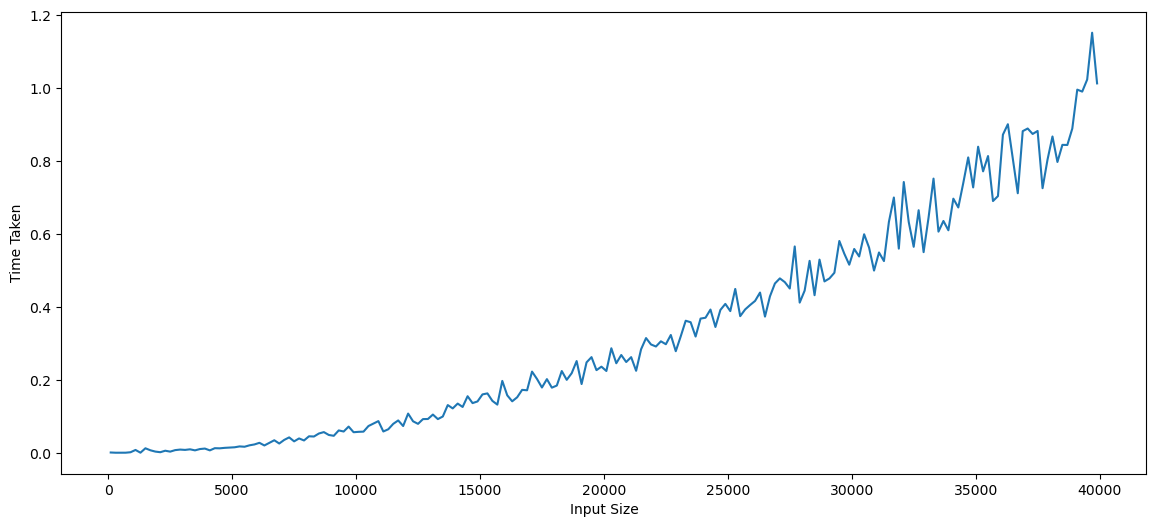

In [6]:
import time

input_sizes = range(100, 40000, 200)
samples = 1
times = []
for n in input_sizes:
    total = 0
    for j in range(samples):
        start_time = time.time()
        random_array = generate_random_array(n)
        slope, y_intercept = calculate_slope_intercept(random_array)
        end_time = time.time()
        total += (end_time - start_time)
    times.append(total / samples)

plt.figure(figsize=(14, 6))
plt.plot(input_sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Time Taken')